# SIS 2 (6 points)

Deadline for submission : **Monday 24th March : 23h50**

- The defense for this SIS will take place next week on **February 27 and March 1**.  
- During the defense, I will ask you to explain your solutions, and you may also receive additional questions.  
- If you are working in a group of two and are not from the same practical class, please contact me in advance to schedule your defense during office hours.  
- Unjustified absences will result in a zero for the assignment, even if you have completed and submitted your work.  


**THE CODE SHOULD BE RUN AND RESULTS NOT CLEARED**

---

## Exercise 1 : Gauss-Markov Assumptions

- **This exercise should be solved on PAPER (and photo or scan should be send).**

- Proofs should be DETAILED (otherwise they aren't proofs...). 





Consider the multi-linear model:

$
y_i = X \beta + \epsilon_i
$

where:
- $y_i$ is an $(n \times 1)$ vector of observations,
- $X$ is an $(n \times k)$ matrix of independent variables,
- $\beta$ is a $(k \times 1)$ vector of parameters,
- $\epsilon_i$ is an $(n \times 1)$ vector of error terms.

And the OLS estimator $\hat{\beta} = (X'X)^{-1} X'y$


---
#### 1. What does the Gauss-Markov theorem states ?

---
#### 2. Which assumptions do you need in order to show that $\hat{\beta}$ is identified? Show identification.

---
#### 3. Show that $\hat{\beta}$ is unbiased, 

i.e., $\mathbb{E}[\hat{\beta}] = \beta$.

---
#### 4. Prove that $\operatorname{Var}(\hat{\beta}) = \sigma^2 (X'X)^{-1}$.

---
#### 5. Efficiency of $\hat{\beta}$ and the Gauss-Markov Theorem  

Let $\tilde{\beta}$ be another **linear and unbiased** estimator of $\beta$. That is,  


$\tilde{\beta} = Ay$


for some matrix $A$ such that $\mathbb{E}[\tilde{\beta}] = \beta$.  

Using **Cochran’s theorem**, show that the variance of any other linear unbiased estimator $\tilde{\beta}$ is always at least as large as the variance of $\hat{\beta}$, the OLS estimator.  

Conclude that $\hat{\beta}$ is the **Best Linear Unbiased Estimator (BLUE)** according to the **Gauss-Markov theorem**.  

---
#### 6. Consistency of $\hat{\beta}$  

A sequence of estimators $\hat{\beta}_n$ is said to be **consistent** for $\beta$ if:  

$\hat{\beta}_n \xrightarrow{p} \beta \quad \text{(convergence in probability)}.$

This means that as the sample size increases, $\hat{\beta}_n$ gets arbitrarily close to $\beta$ with high probability.  

Using the **Law of Large Numbers (LLN)**, prove that the OLS estimator $\hat{\beta}$ is consistent under standard assumptions.  


---

## Exercise 2 : Linear Dependence and Rank of a Matrix

**Understanding Linear Dependence in Matrices**

In the context of a matrix, **linear dependence** refers to a situation where one or more columns (or rows) can be written as a linear combination of other columns (or rows). If all columns (or rows) are linearly independent, no such relationship exists.

A set of column vectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ in $ \mathbb{R}^m $ is **linearly dependent** if there exist scalars $ c_1, c_2, \dots, c_n $, **not all zero**, such that:

$$
c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_n \mathbf{v}_n = \mathbf{0}
$$

Equivalently, a matrix $ A $ with columns $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ is **linearly dependent** if there is a nontrivial solution to:

$$
A \mathbf{c} = \mathbf{0}
$$

where $ A = [\mathbf{v}_1 \, \mathbf{v}_2 \, \dots \, \mathbf{v}_n] $ and $ \mathbf{c} \neq \mathbf{0} $.

One way to determine if a set of vectors (columns or rows) is linearly dependent is by checking the **rank** of the matrix.

- The **rank** of a matrix $ A $ is the number of **linearly independent** columns (or rows).
- If $ \text{rank}(A) = n $ (the number of columns), the columns are **linearly independent**.
- If $ \text{rank}(A) < n $, then at least one column can be written as a linear combination of the others, meaning the columns are **linearly dependent**.

To compute the rank of a matrix, we can transform it into **Row Echelon Form (REF)** using **Gaussian Elimination**. The number of nonzero rows in REF corresponds to the rank:

$$
\text{rank}(A) = \text{number of nonzero rows in REF}
$$

If $ \text{rank}(A) < n $, the matrix has **linearly dependent columns**.

---

#### **Task: Implement Rank Calculation Using Gaussian Elimination**
Your goal is to implement a function that determines the rank of a matrix using Gaussian Elimination, without relying on external libraries (like NumPy or SciPy). 
Then, using your function, determine whether the given matrices are linearly independent.

### **Instructions**
1. Implement the function `rank_of_matrix(matrix: list[list[float]]) -> int` that:
   - Takes a matrix as a list of lists.
   - Performs Gaussian elimination to convert it into row echelon form.
   - Returns the rank (i.e., the number of nonzero rows in the echelon form).

2. Use your function to determine if the following matrices have **linearly independent columns**.

### **Example Matrices**
```python
matrix1 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

matrix2 = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]

In [1]:
from numpy.linalg import matrix_rank



def row_echelon_form(matrix : list[list[float]]) -> list[list[float]]:
    '''Return row echelon form of a matrix

    ### Arguments:
        **matrix**: *list[list[float]]*

    ### Returns:
        **ref_matrix**: *list[list[flot]]* - the REF of the matrix

    ### Raises:
        **ValueError** - if the matrix arg is not a valid matrix
    '''
    number_rows, number_cols = len(matrix), len(matrix[0])
    
    for row in matrix: #check if the matrix is valid or not
        if len(row) != number_cols:
            raise ValueError('The provided list is not a proper matrix!')

    leading_col = 0 # the index of the leading column

    for row_index in range(number_rows): # for each row in the 
        if leading_col >= number_cols: #if we have reached the last column -> return the current matrix
            return matrix
        i = row_index
        
        while matrix[i][leading_col] == 0: # find a non-zero pivot 
            i += 1
            if i == number_rows: # if there are no pivots in the first columns
                i = row_index # search in other columns
                leading_col += 1
                if leading_col == number_cols: # if there is not a single non-zero pivot -> return the current matrix
                    return matrix
                
        matrix[i], matrix[row_index] = matrix[row_index], matrix[i] #swap rows)

        for i in range(row_index + 1, number_rows):
            factor = matrix[i][leading_col] / matrix[row_index][leading_col] # the factor to match the current cell
            values_of_2_rows = zip(matrix[row_index], matrix[i]) ## zip 2 rows into a list of tuples 
            matrix[i] = [i_val - factor * r_val for r_val, i_val in values_of_2_rows] # compute the row

        leading_col += 1 # move to the next column

    return matrix

def rank_matrix(matrix : list[list[float]]):
    """Returns the rank of a matrix using Gaussian elimination."""
    matrix_ref = row_echelon_form(matrix)
    rank = len([row for row in matrix_ref if any(row)])
    return rank

matrix1 = [[1, 2, 3], 
           [4, 5, 6], 
           [7, 8, 10]]
print("Rank of matrix1:", rank_matrix(matrix1))

matrix2 = [[1, 2, 3], 
           [2, 4, 6], 
           [3, 6, 9]]
print("Rank of matrix2:", rank_matrix(matrix2))

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]
print("Rank of matrix3:", rank_matrix(matrix3))


Rank of matrix1: 3
Rank of matrix2: 1
Rank of matrix3: 2


In [2]:
from numpy.linalg import matrix_rank

print("Actual Rank of matrix1:", matrix_rank(matrix1))
print("Actual Rank of matrix2:", matrix_rank(matrix2))
print("Actual Rank of matrix3:", matrix_rank(matrix3))

Actual Rank of matrix1: 3
Actual Rank of matrix2: 1
Actual Rank of matrix3: 2


## Exercise 3 : Coding tasks

Consider the following dataset

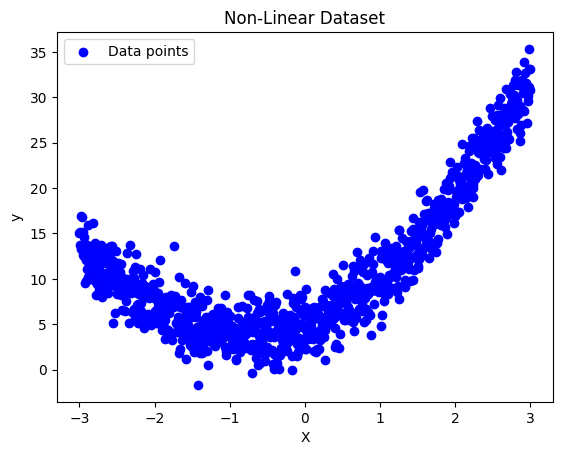

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(-3, 3, 1_000).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)

plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset')
plt.legend()
plt.show()


### **Step 1**

You should implement a custom regression class using the template below that does the following:
- Parameters: Accepts a flag to include a constant (intercept) or not.
- Fit: Estimate the OLS parameters using the formulas
$$\widehat a = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}, \quad 
    \widehat b = \bar{y} - \widehat a \bar{x}.$$
- Predict: Compute predictions using the estimated parameters.
- Residuals: Return the residuals, defined as:
$$ residuals = y − \widehat y $$

In [4]:
class CustomLinearRegression:
    '''Linear regression model using OLS
    '''
    def __init__(self, use_intercept=True):
        self.use_intercept = use_intercept
        self.coef_ = None
        self.intercept_ = 0

    def _slope(self, X: np.array, y: np.array) -> float:
        '''Get the slope / alpha coefficient of the Linear Regression model

        ### Arguments:
            **X**: *np.array* - matrix of features
            **Y**: *np.array* - target variable

        ### Returns:
            **slope**: *float* - slope of the regression line
        '''
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        nominator = sum((x_i-x_mean) * (y_i-y_mean) for x_i, y_i in zip(X, y))
        denominator = sum(((x_i - x_mean)**2 for x_i in X))

        return nominator / denominator
    
    def _intercept(self, X: np.array, y: np.array) -> float:
        '''Get the intercept of the Linear Regression model
        
        ### Arguments:
            **X**: *np.array* - matrix of features
            **Y**: *np.array* - target variable

        ### Returns:
            **intercept**: *float* - intercept of the regression line
        '''
        slope = self._slope(X, y)
        return np.mean(y) - slope * np.mean(X)
    
    def fit(self, X: np.array, y: np.array) -> None:
        '''Train the Linear Regression model
        
        ### Arguments:
            **X**: *np.array* - matrix of features
            **Y**: *np.array* - target variable

        ### Returns:
            None
        '''
        self.coef_ = self._slope(X, y)
        if self.use_intercept:
            self.intercept_ = self._intercept(X, y)

    def predict(self, X: np.array) -> np.array:
        '''Predict values of X using the Linear Regression model
        
        ### Arguments:
            **X**: *np.array* - matrix of features

        ### Returns:
            **y_pred**: *np.array* - matrix of predictions
        '''
        if self.use_intercept:
            return self.coef_ * X + self.intercept_ # aX + b
        else:
            return self.coef_ * X # aX
        

    def residuals(self, X: np.array, y: np.array) -> np.array:
        '''Calculate the resiudals of the Linear Regression model

        Residuals - difference between the real and the predicted
        value of the target variable
        
        ### Arguments:
            **X**: *np.array* - matrix of features
            **Y**: *np.array* - target variable

        ### Returns:
            **residuals**: *np.array* - matrix of residuals
         '''
        y_pred = self.predict(X)
        return y - y_pred # difference between the real and the predicted value
    
    def score(self, X: np.array, y: np.array) -> float:
        '''Calculate R^2 of the Linear Regression model

        R^2 - coefficient of determination - the measure
        of a regression model's accuracy
        
        ### Arguments:
            **X**: *np.array* - matrix of features
            **Y**: *np.array* - target variable

        ### Returns:
            **r2**: *float* - R^2 score
        '''
        residuals = self.residuals(X, y)
        ss_res = sum((res**2 for res in residuals))
        ss_tot = sum(((y_i - np.mean(y)) ** 2 for y_i in y))
        r2 = 1 - (ss_res / ss_tot)
        return r2[0]

### Step 2
- Split the dataset into training and testing sets
- Use your custom linear regression class to fit the model

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lin_reg = CustomLinearRegression(use_intercept=True)
lin_reg.fit(X_train, y_train)

In [6]:
print("Coefficient of determination for Custom Linear Regression: ", lin_reg.score(X_train, y_train))

Coefficient of determination for Custom Linear Regression:  0.4576038900120738


### Step 3
- Compute predictions for the test data.

In [8]:
y_pred = lin_reg.predict(X_test)
y_pred[:10]

array([[11.43888639],
       [15.37448355],
       [15.42914462],
       [13.97151604],
       [ 9.43464709],
       [14.29948247],
       [13.3520239 ],
       [11.29312353],
       [17.59736713],
       [ 4.42404886]])

In [9]:
print('Test data R^2:', lin_reg.score(X_test, y_test)) #view the R^2 of test data

Test data R^2: 0.45663560574639084


### Step 4

- Plot the actual data points and overlay the regression line from your custom model.

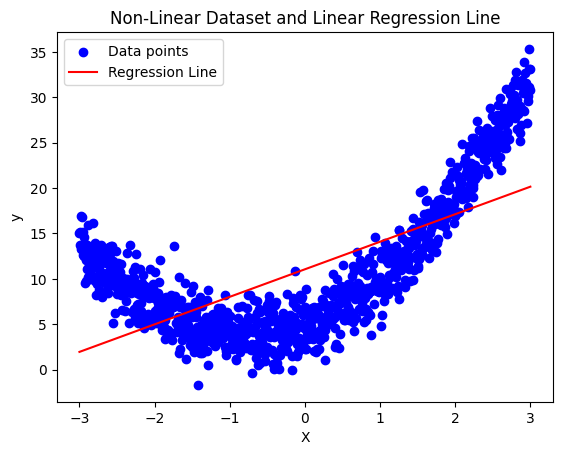

In [10]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, lin_reg.predict(X), label='Regression Line', color='r') #plot the data and the predictions as a red line
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset and Linear Regression Line')
plt.legend()
plt.show()

#### Is our linear regression similar to the one in scikit-learn?

In [11]:
from sklearn.linear_model import LinearRegression

sk_lin_reg = LinearRegression()
sk_lin_reg.fit(X_train, y_train)
print('Coefficient of determination for the scikit-learn\'s Linear Regreession:', sk_lin_reg.score(X_train, y_train))

Coefficient of determination for the scikit-learn's Linear Regreession: 0.4576038900120737


Since, $R^2$ are the same for both my and scikit-learn's regression, I can say that my model is working properly.

### Step 5
- Create a plot of residuals 
- Are the residuals randomly dispersed around zero?
- What does the pattern (or lack thereof) tell you about the appropriateness of a linear model for this dataset?

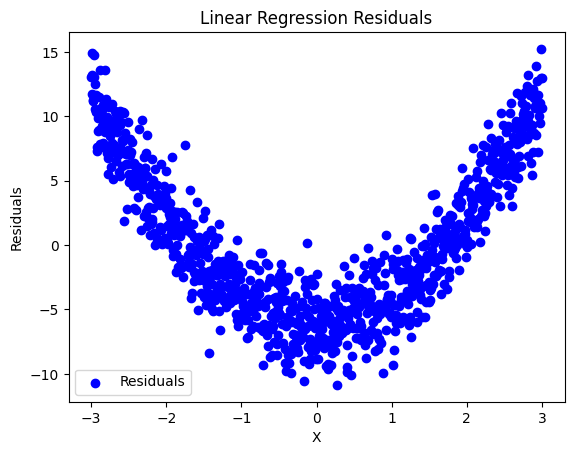

In [12]:
residuals = lin_reg.residuals(X, y) #get the residuals of the custom linear regression
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')
plt.legend()
plt.show()

The residuals are **not randomly distributed** around zero. We can see that they follow aproxiamately a quadratic relationship to the values of X.   
The pattern created by the residuals shows that the simple linear regression model is not the best fit for this data. This fact is further underlined by the **coefficient of determination** $R^2$. $R^2$ for both train and test data is round $0.45$, which is considered not the best fit (0 - completely unsuited, 1 - perfect model). 

### Step 6

- Use sklearn to implement Polynomial Regression and fit it on the same dataset.
- Compare the results.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False) # select the model as polynomial with the degreee of 2 - parabola
poly_features_train = poly.fit_transform(X_train.reshape(-1, 1))  # transform our X into a 2D array and fit the polynomial features
print('Train data:', poly_features_train[:10]) # poly_features has the values of X and their squares in a single row

poly_features_test = poly.fit_transform(X_test.reshape(-1, 1))
print('Test data:', poly_features_test[:10])


Train data: [[-2.50750751  6.2875939 ]
 [ 2.95195195  8.71402033]
 [ 1.73873874  3.0232124 ]
 [ 2.36936937  5.61391121]
 [-0.60960961  0.37162388]
 [-1.06006006  1.12372733]
 [ 0.11711712  0.01371642]
 [ 2.5015015   6.25750976]
 [ 2.53753754  6.43909675]
 [-2.96996997  8.82072162]]
Test data: [[ 0.12912913  0.01667433]
 [ 1.42642643  2.03469235]
 [ 1.44444444  2.08641975]
 [ 0.96396396  0.92922652]
 [-0.53153153  0.28252577]
 [ 1.07207207  1.14933853]
 [ 0.75975976  0.57723489]
 [ 0.08108108  0.00657414]
 [ 2.15915916  4.66196827]
 [-2.18318318  4.76628881]]


In [14]:
poly_reg_model = LinearRegression() # since poly regression is a linear model we will use linear regression
poly_reg_model.fit(poly_features_train, y_train)

print('Coefficient of determination for train data:', poly_reg_model.score(poly_features_train, y_train))

Coefficient of determination for train data: 0.9366338600264298


In [15]:
poly_y_pred = poly_reg_model.predict(poly_features_test)
print('Test predictions: \n', poly_y_pred[:10])

print('Coefficient of determination for test data:', poly_reg_model.score(poly_features_test, y_test))

Test predictions: 
 [[ 5.48786518]
 [13.51468858]
 [13.67377659]
 [ 9.87776574]
 [ 3.99844467]
 [10.65100599]
 [ 8.54530506]
 [ 5.32041865]
 [21.03620065]
 [ 7.94629482]]
Coefficient of determination for test data: 0.9378387301594651


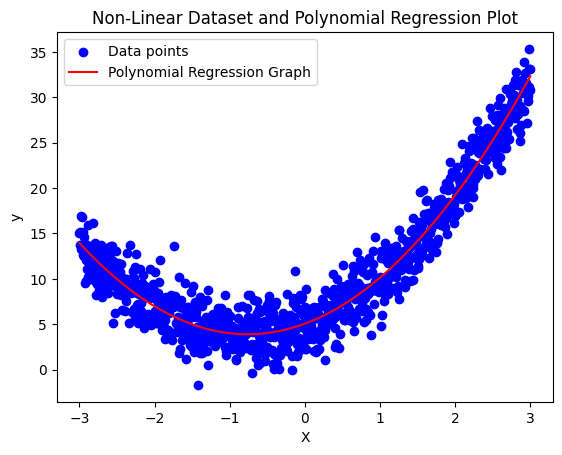

In [16]:
poly_X = poly.fit_transform(X.reshape(-1, 1))

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, poly_reg_model.predict(poly_X), label='Polynomial Regression Graph', color='r') #plot the data and the predictions as a red line
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset and Polynomial Regression Plot')
plt.legend()
plt.show()

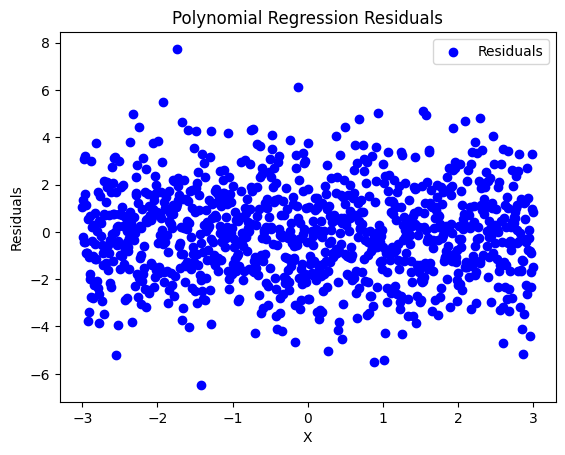

In [17]:
residuals = y - poly_reg_model.predict(poly_X) #get the residuals of the custom linear regression
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')
plt.legend()
plt.show()

Comparately, we can cleatly see that
- The $R^2$ score for both train and test daa are almost twice as high as that of simple linear regression
- The residuals are randomly distributed around 0 and they do not follow any patterns

### Final Discussion

- Discuss how the linear model may underfit the data because it cannot capture the inherent non-linear relationships
- Explain how introducing polynomial terms leads to a better fit

- The linear model underfits the data, and consequently performs purely and cannot make good predictions. This happens because the relationship between X and y was inherently non-linear and trying to approximate the results for X result in high bias, meaning the model **oversimplifies the data** and performs poorly on both training and test data.
- Introducing polynomial terms leads to a better fit because the inherit relationship between X and y is not linear, higher-degree polynomial terms allow the model to better fit complex patterns and make it more flexible, while still balancing the simplicity of the model. The graph starts having more curves, making it easier to predict more complex data